# Set Up

Mount google drive, ignore if not using Google Collab:

In [1]:
from google.colab import drive

# mount google drive
drive.mount('/content/drive')
%cd /content/drive/My Drive
!git clone https://github.com/FranciscoLozCoding/cooling_with_code.git
%cd cooling_with_code
!git pull

Mounted at /content/drive
/content/drive/My Drive
fatal: destination path 'cooling_with_code' already exists and is not an empty directory.
/content/drive/My Drive/cooling_with_code
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 247.28 KiB | 626.00 KiB/s, done.
From https://github.com/FranciscoLozCoding/cooling_with_code
   fbd9066..8a60e00  main       -> origin/main
Updating fbd9066..8a60e00
Fast-forward
 04_EDA.ipynb | 278 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++--
 1 file changed, 273 insertions(+), 5 deletions(-)
fatal: cannot exec '.git/hooks/post-merge': Permission denied


Import libraries

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# google collab
from google.colab import drive

#data science
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pickle

#custom tools
from tools.environment import VALID_SPLIT, RANDOM_STATE
from tools.UHI_model_and_feature_selection import load_and_prepare_data, get_feature_importance, plot_feature_importance_comparison
from tools.distribution import plot_target_var_distribution

# Simple Model Development

This notebook is for creating a simple model for us to use as a baseline comparison when creating our future models. For details on the train/test dataset refer to our past notebooks:
- [01_dataset_generation](/01_dataset_generation.ipynb)
- [02_more_dataset_generation](/02_more_dataset_generation.ipynb)

## Train and Validation Split


We will now split the training datasets into 70% training data and 30% validation data.

In [7]:
#load in traning dataset
fiftym_train = pd.read_csv('data/train/50m_buffer_dataset.csv')
hunm_train = pd.read_csv('data/train/100m_buffer_dataset.csv')
hunfifty_train = pd.read_csv('data/train/150m_buffer_dataset.csv')

# Split the data into features (X) and target (y), and then into training and validation sets
## 50m buffer zone dataset
fiftym_x = fiftym_train.drop(columns=['UHI']).values
fiftym_y = fiftym_train['UHI'].values
fiftym_x_train, fiftym_x_valid, fiftym_y_train, fiftym_y_valid = train_test_split(
    fiftym_x, fiftym_y,
    test_size=VALID_SPLIT,
    random_state=RANDOM_STATE)
fiftym_x_names = list(fiftym_train.drop(columns=['UHI']).columns)

## 100m buffer zone dataset
hunm_x = hunm_train.drop(columns=['UHI']).values
hunm_y = hunm_train['UHI'].values
hunm_x_train, hunm_x_valid, hunm_y_train, hunm_y_valid = train_test_split(
    hunm_x, hunm_y,
    test_size=VALID_SPLIT,
    random_state=RANDOM_STATE)
hunm_x_names = list(hunm_train.drop(columns=['UHI']).columns)

## 150m buffer zone dataset
hunfifty_x = hunfifty_train.drop(columns=['UHI']).values
hunfifty_y = hunfifty_train['UHI'].values
hunfifty_x_train, hunfifty_x_valid, hunfifty_y_train, hunfifty_y_valid = train_test_split(
    hunfifty_x, hunfifty_y,
    test_size=VALID_SPLIT,
    random_state=RANDOM_STATE)
hunfifty_x_names = list(hunfifty_train.drop(columns=['UHI']).columns)

Lets make sure that the distribution of the target variable (UHI) is kept in the training and validation split.

### 50m

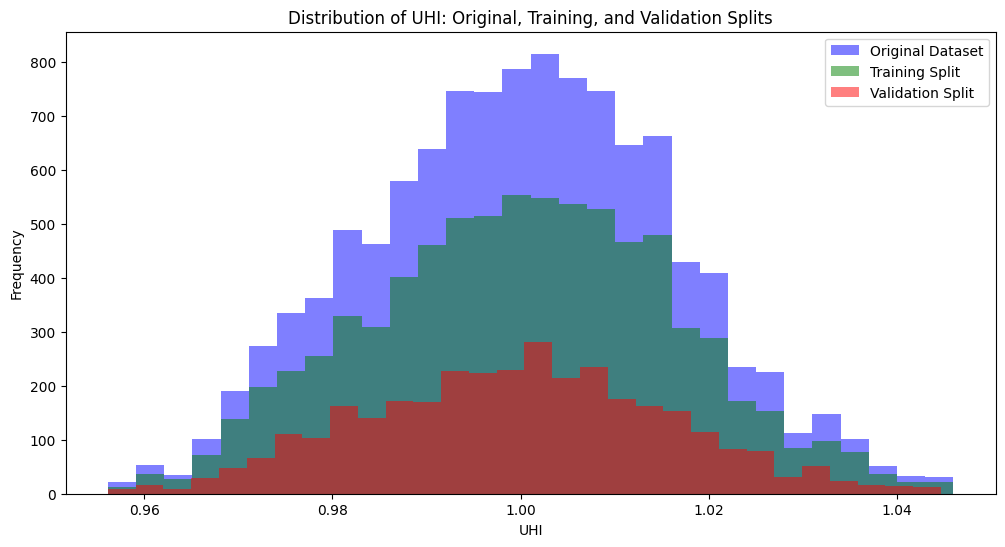

In [8]:
# use custom tool we created
plt = plot_target_var_distribution(fiftym_y, fiftym_y_train, fiftym_y_valid)
plt.show()

### 100m

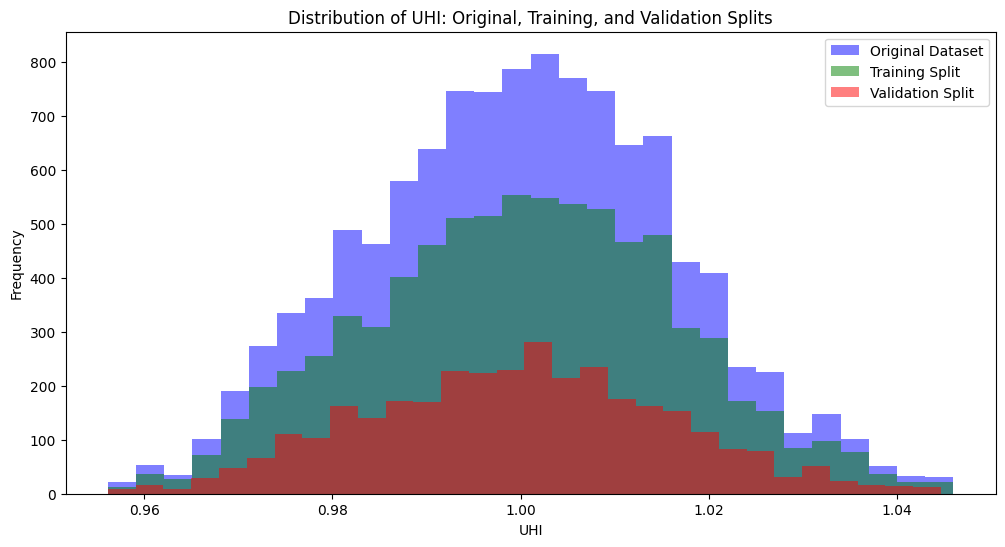

In [9]:
# use custom tool we created
plt = plot_target_var_distribution(hunm_y, hunm_y_train, hunm_y_valid)
plt.show()

### 150m

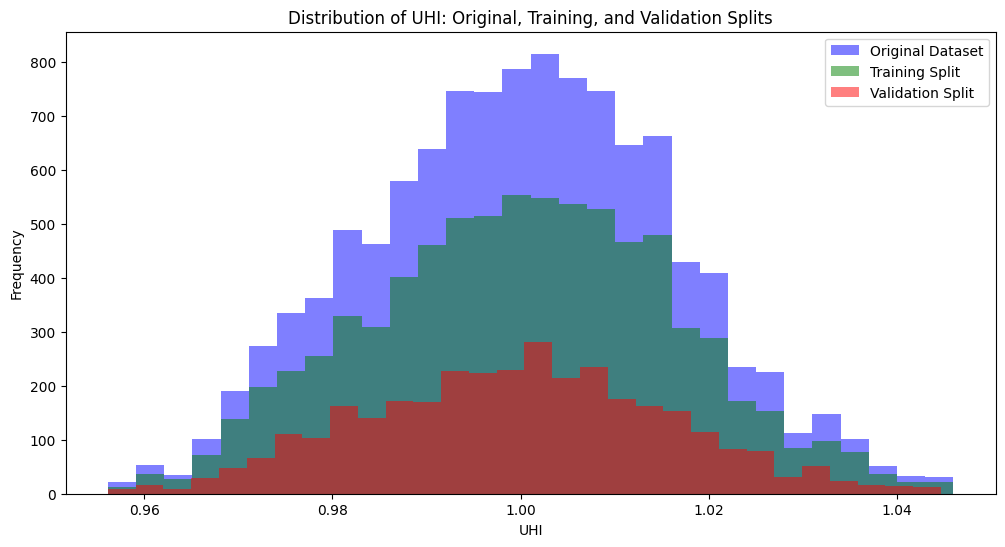

In [10]:
# use custom tool we created
plt = plot_target_var_distribution(hunfifty_y, hunfifty_y_train, hunfifty_y_valid)
plt.show()

## Feature Scaling

Next, we will normalize all columns so that none will overpower another because it has greater values. This is called Feature Scaling. We will use standard scaler since the linear model we will use works best with values that are standarized.

In [11]:
# Scale the training and validation data using standardscaler

## 50m buffer zone dataset
fiftym_sc = StandardScaler()
fiftym_x_train = fiftym_sc.fit_transform(fiftym_x_train)
fiftym_x_valid = fiftym_sc.transform(fiftym_x_valid)

## 100m buffer zone dataset
hunm_sc = StandardScaler()
hunm_x_train = hunm_sc.fit_transform(hunm_x_train)
hunm_x_valid = hunm_sc.transform(hunm_x_valid)

## 150m buffer zone dataset
hunfifty_sc = StandardScaler()
hunfifty_x_train = hunfifty_sc.fit_transform(hunfifty_x_train)
hunfifty_x_valid = hunfifty_sc.transform(hunfifty_x_valid)

## Model Training

Now that we have the data in a format suitable for machine learning, we can begin training a model. We will use a random forest regression model from the scikit-learn library. We chose this model because it is simple and it can provide us feedback on what features were important. We won't go too in depth in hyper parameters here since our aim is just to create a simple baseline model for comparison.

In [12]:
# Train the Random Forest model on the training data

## 50m buffer zone model
fiftym_model = RandomForestRegressor(
    n_estimators=100,
    random_state=RANDOM_STATE,
    criterion="squared_error")
fiftym_model.fit(fiftym_x_train, fiftym_y_train)

RandomForestRegressor(random_state=123)

In [13]:
## 100m buffer zone model
hunm_model = RandomForestRegressor(
    n_estimators=100,
    random_state=RANDOM_STATE,
    criterion="squared_error")
hunm_model.fit(hunm_x_train, hunm_y_train)

RandomForestRegressor(random_state=123)

In [14]:
## 150m buffer zone model
hunfifty_model = RandomForestRegressor(
    n_estimators=100,
    random_state=RANDOM_STATE,
    criterion="squared_error")
hunfifty_model.fit(hunfifty_x_train, hunfifty_y_train)

RandomForestRegressor(random_state=123)

## Model Evaluation

Now that we have trained our model, the next step is to evaluate its performance. For evaluation, we will use the R² score. This was chosen by the challenge authors as the score to evaluate participants models.

### In-Sample Evaluation

First, we will be evaluating our model's performance using the R² score on the training data. It is important to note that this is in-sample performance testing, which involves evaluating the model on the training dataset. These metrics are not truly indicative of the model's ability to generalize.

In [15]:
# Make predictions on the training data

## 50m buffer zone dataset
fiftym_insample_predictions = fiftym_model.predict(fiftym_x_train)

## 100m buffer zone dataset
hunm_insample_predictions = hunm_model.predict(hunm_x_train)

## 150m buffer zone dataset
hunfifty_insample_predictions = hunfifty_model.predict(hunfifty_x_train)

In [16]:
# calculate R-squared score for in-sample predictions
print(f"In-Sample Evaluation:")

## 50m buffer zone dataset
fiftym_insample_r2 = r2_score(fiftym_y_train, fiftym_insample_predictions)
print(f"  50m buffer zone R-squared: {fiftym_insample_r2}")

## 100m buffer zone dataset
hunm_insample_r2 = r2_score(hunm_y_train, hunm_insample_predictions)
print(f"  100m buffer zone R-squared: {hunm_insample_r2}")

## 150m buffer zone dataset
hunfifty_insample_r2 = r2_score(hunfifty_y_train, hunfifty_insample_predictions)
print(f"  150m buffer zone R-squared: {hunfifty_insample_r2}")

In-Sample Evaluation:
  50m buffer zone R-squared: 0.9798971030870426
  100m buffer zone R-squared: 0.9869424603623242
  150m buffer zone R-squared: 0.9859774790882676


### Out-Sample Evaluation

To estimate the out-of-sample performance, we will predict on the validation data now. Comparing the in-sample and out-sample evaluations can tell us if the model is overfitting.

In [17]:
# Make predictions on the validation data

## 50m buffer zone dataset
fiftym_outsample_predictions = fiftym_model.predict(fiftym_x_valid)

## 100m buffer zone dataset
hunm_outsample_predictions = hunm_model.predict(hunm_x_valid)

## 150m buffer zone dataset
hunfifty_outsample_predictions = hunfifty_model.predict(hunfifty_x_valid)

In [18]:
# calculate R-squared score for out-sample predictions
print(f"Out-Sample Evaluation:")

## 50m buffer zone dataset
fiftym_outsample_r2 = r2_score(fiftym_y_valid, fiftym_outsample_predictions)
print(f"  50m buffer zone R-squared: {fiftym_outsample_r2}")

## 100m buffer zone dataset
hunm_outsample_r2 = r2_score(hunm_y_valid, hunm_outsample_predictions)
print(f"  100m buffer zone R-squared: {hunm_outsample_r2}")

## 150m buffer zone dataset
hunfifty_outsample_r2 = r2_score(hunfifty_y_valid, hunfifty_outsample_predictions)
print(f"  150m buffer zone R-squared: {hunfifty_outsample_r2}")

Out-Sample Evaluation:
  50m buffer zone R-squared: 0.8622465452118891
  100m buffer zone R-squared: 0.9116159865712685
  150m buffer zone R-squared: 0.9003752879387035


## Feature Importance

Here, we will use the RandomForestRegressor to see feature importance.

>NOTE: these functions were defined in our `tools` directory. NOT in this notebook.

Loading data from data/train/50m_buffer_dataset.csv
Loading data from data/train/100m_buffer_dataset.csv
Loading data from data/train/150m_buffer_dataset.csv


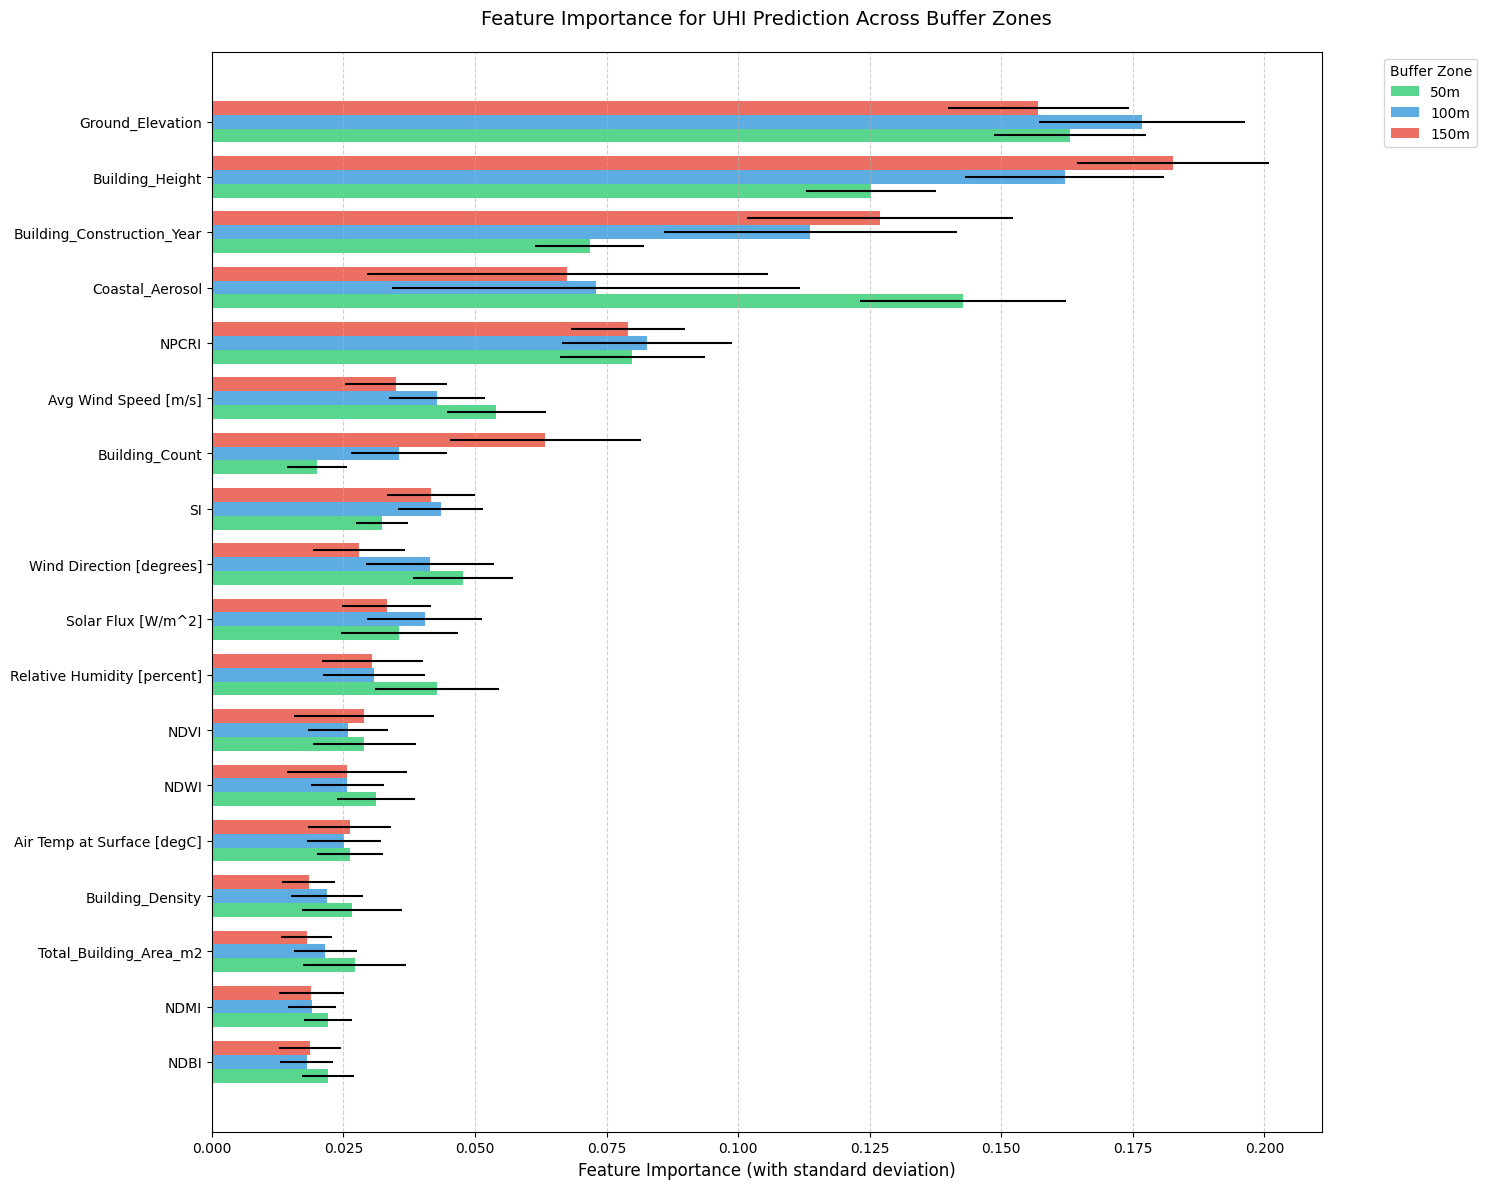

In [19]:
# Load datasets with actual UHI values
X_50m, y_50m = load_and_prepare_data('data/train/50m_buffer_dataset.csv')
X_100m, y_100m = load_and_prepare_data('data/train/100m_buffer_dataset.csv')
X_150m, y_150m = load_and_prepare_data('data/train/150m_buffer_dataset.csv')

# Calculate importance using actual UHI values
importance_50m = get_feature_importance(X_50m, y_50m)
importance_100m = get_feature_importance(X_100m, y_100m)
importance_150m = get_feature_importance(X_150m, y_150m)

# Create visualization
plt = plot_feature_importance_comparison(importance_50m, importance_100m, importance_150m)
plt.show()

# Challenge Submission

We will now submit our simple `RandomForestRegressor` model to the challenge. Since our 150m buffer zone RandomForestRegressor model did the best we will use this model. Remember, this is just for comparison so this is not our final model.
>NOTE: We can have multiple submissions.

In [22]:
# Reading the test dataset for the submission
hunfifty_test = pd.read_csv('data/test/150m_buffer_test_dataset.csv')

# Remove lat and lon, for now will be combined with predicted UHI later for submission
lon = hunfifty_test['Longitude'].values
lat = hunfifty_test['Latitude'].values
hunfifty_test = hunfifty_test.drop(columns=['Longitude', 'Latitude']).values

# Feature Scaling
hunfifty_x_test = hunfifty_sc.transform(hunfifty_test)

# Model prediction
hunfifty_test_predictions = hunfifty_model.predict(hunfifty_x_test)

# combine predictions with lat and lon
submission_df = pd.DataFrame({
    'Longitude': lon,
    'Latitude': lat,
    'UHI Index': hunfifty_test_predictions
})
submission_df

,Longitude,Latitude,UHI Index
0,-73.971665,40.788763,0.967827
1,-73.971928,40.788875,0.969455
2,-73.967080,40.789080,0.971887
3,-73.972550,40.789082,0.973429
4,-73.969697,40.787953,0.958781
...,...,...,...
1035,-73.919388,40.813803,1.021324
1036,-73.931033,40.833178,1.014044
1037,-73.934647,40.854542,1.032266
1038,-73.917223,40.815413,1.029830


Save the submission dataframe to submit into challenge portal:

In [23]:
submission_df.to_csv("150m_simple_RandomForestRegressor_model_submission.csv", index=False)

Score We Received:

![submission score](https://github.com/FranciscoLozCoding/cooling_with_code/blob/main/images/150m_simple_RandomForestRegressor_score.jpeg?raw=1)

# Summary Table

Here we will provide a summary table of the simple models, for quick comparison for our future models.

In [ ]:
# create the summary table
models = [
    '50m_simple_RandomForestRegressor_model',
    '100m_simple_RandomForestRegressor_model',
    '150m_simple_RandomForestRegressor_model']

data = {
    'Model': models,
    'Training R-squared': [fiftym_insample_r2, hunm_insample_r2, hunfifty_insample_r2],
    'Validation R-squared': [fiftym_outsample_r2, hunm_outsample_r2, hunfifty_outsample_r2]
}

summary_df = pd.DataFrame(data)
summary_df

,Model,Training R-squared,Validation R-squared
0,50m_simple_RandomForestRegressor_model,0.979897,0.862247
1,100m_simple_RandomForestRegressor_model,0.986942,0.911616
2,150m_simple_RandomForestRegressor_model,0.990018,0.931347


# Save The Model

Finally, we will save all three models so we don't have to retrain them. This will also allow us to use them in other notebooks.

In [ ]:
# Save the models to files

## 50m buffer zone model
with open('50m_simple_RandomForestRegressor_model.pkl', 'wb') as f:
    pickle.dump(fiftym_model, f)
with open('50m_standard_scaler.pkl', 'wb') as f:
    pickle.dump(fiftym_sc, f)

## 100m buffer zone model
with open('100m_simple_RandomForestRegressor_model.pkl', 'wb') as f:
    pickle.dump(hunm_model, f)
with open('100m_standard_scaler.pkl', 'wb') as f:
    pickle.dump(hunm_sc, f)

## 150m buffer zone model
with open('150m_simple_RandomForestRegressor_model.pkl', 'wb') as f:
    pickle.dump(hunfifty_model, f)
with open('150m_standard_scaler.pkl', 'wb') as f:
    pickle.dump(hunfifty_sc, f)

# Conclusion

Now that we have our simple models developed we can move on to Exploratory Data Analysis to provide us a starting point for developing more complex models...